### Problem Statement
Explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading
strategies.



### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Datasets

In [2]:
trades = pd.read_csv("/content/drive/MyDrive/ds_sreekanth/historical_data.csv")
sentiment = pd.read_csv("/content/drive/MyDrive/ds_sreekanth/fear_greed_index.csv")

In [3]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)


### 3. Data Processing

In [6]:
print("\n--- trades columns ---")
print(trades.columns.tolist()[:30])
print("\n--- sentiment columns ---")
print(sentiment.columns.tolist())


--- trades columns ---
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

--- sentiment columns ---
['timestamp', 'value', 'classification', 'date']


In [7]:
time_col = "Timestamp IST" if "Timestamp IST" in trades.columns else "Timestamp"
trades[time_col] = pd.to_datetime(trades[time_col], errors="coerce")

# Create 'date' column
trades["date"] = trades[time_col].dt.date
trades["date"] = pd.to_datetime(trades["date"])

In [8]:
# Convert sentiment date column
sentiment["date"] = pd.to_datetime(sentiment["date"], errors="coerce")

# --- Check ranges ---
print("\nTrade date range:", trades["date"].min(), "→", trades["date"].max())
print("Sentiment date range:", sentiment["date"].min(), "→", sentiment["date"].max())



Trade date range: 2023-01-05 00:00:00 → 2025-12-04 00:00:00
Sentiment date range: 2018-02-01 00:00:00 → 2025-05-02 00:00:00


In [9]:
# --- Align date ranges ---
# If your trade timestamps are wrong (1970), check if they are actually Unix seconds or milliseconds
# Try converting assuming seconds since epoch
if trades["date"].min().year == 1970:
    print("\n⚙️ Converting timestamp assuming Unix seconds...")
    trades[time_col] = pd.to_datetime(trades["Timestamp"], unit="s", errors="coerce")
    trades["date"] = trades[time_col].dt.date
    trades["date"] = pd.to_datetime(trades["date"])

    print("Fixed trade date range:", trades["date"].min(), "→", trades["date"].max())


In [10]:
# --- Merge datasets ---
trades_merged = pd.merge(trades, sentiment, on="date", how="inner")
print("\nMerged data shape:", trades_merged.shape)


Merged data shape: (35864, 20)


In [11]:
trades_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed


### 4. Data Visulaisation

In [12]:
# --- Ensure numeric PnL ---
trades_merged["Closed PnL"] = pd.to_numeric(trades_merged["Closed PnL"], errors="coerce")

# --- Compute average performance per sentiment ---
sentiment_perf = (
    trades_merged.groupby("classification")["Closed PnL"]
    .agg(["count", "mean", "median", "std"])
    .reset_index()
)

In [13]:
print("\n" + "="*60)
print("📊 Trader Performance vs. Market Sentiment")
print("="*60)

print(sentiment_perf.to_string(index=False))


📊 Trader Performance vs. Market Sentiment
classification  count       mean  median         std
  Extreme Fear   2326   1.891632 0.00000   76.727713
 Extreme Greed   5621 205.816345 0.96048 1861.557119
          Fear  13869 128.287950 0.00000 1342.348497
         Greed  11292  53.988003 0.00000 1399.468182
       Neutral   2756  27.088803 0.00000  142.945889


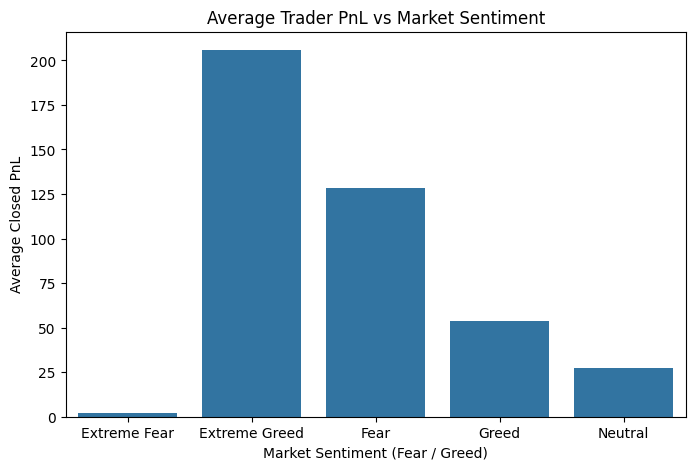

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x="classification", y="mean", data=sentiment_perf)
plt.title("Average Trader PnL vs Market Sentiment")
plt.xlabel("Market Sentiment (Fear / Greed)")
plt.ylabel("Average Closed PnL")
plt.show()

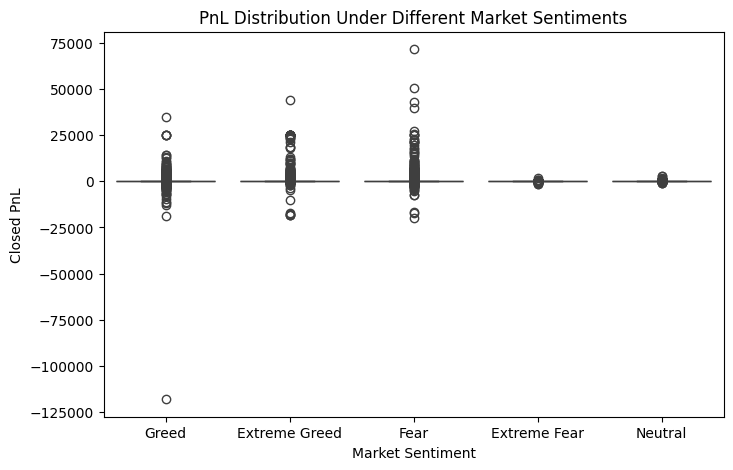

In [15]:
# PnL distribution comparison
plt.figure(figsize=(8,5))
sns.boxplot(x="classification", y="Closed PnL", data=trades_merged)
plt.title("PnL Distribution Under Different Market Sentiments")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()

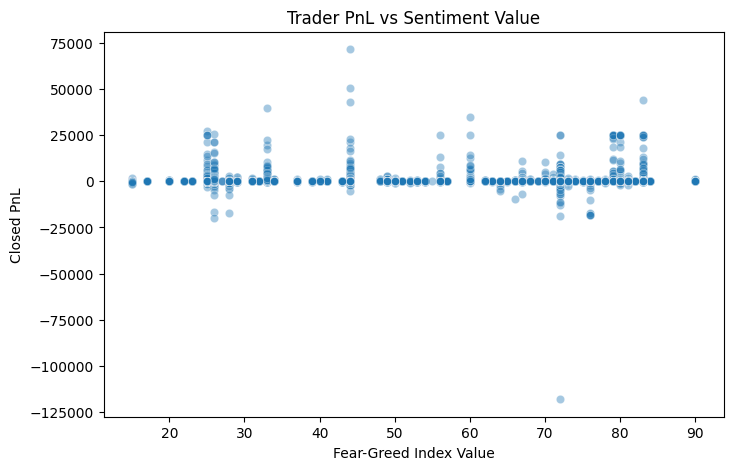


📈 Correlation between sentiment value and trader PnL: 0.011


In [16]:
# Make sure sentiment value is numeric
trades_merged["value"] = pd.to_numeric(trades_merged["value"], errors="coerce")

plt.figure(figsize=(8,5))
sns.scatterplot(x="value", y="Closed PnL", data=trades_merged, alpha=0.4)
plt.title("Trader PnL vs Sentiment Value")
plt.xlabel("Fear-Greed Index Value")
plt.ylabel("Closed PnL")
plt.show()

corr = trades_merged[["value", "Closed PnL"]].corr().iloc[0,1]
print(f"\n📈 Correlation between sentiment value and trader PnL: {corr:.3f}")


### 5. Deep Analysis — Hidden Patterns & Insights

#### Analize and Visualize: Long vs Short mean PnL by sentiment

In [17]:
# Compare performance of Long vs Short during different sentiment phases
side_perf = (
    trades_merged.groupby(["classification", "Side"])["Closed PnL"]
    .agg(["count", "mean", "median", "std"])
    .reset_index()
    .sort_values(["classification", "Side"])
)

print("\n📊 Trader Side Performance by Sentiment:\n")
print(side_perf.to_string(index=False))


📊 Trader Side Performance by Sentiment:

classification Side  count       mean   median         std
  Extreme Fear  BUY   1168  -3.248825 0.000000   73.901203
  Extreme Fear SELL   1158   7.076480 0.037345   79.171224
 Extreme Greed  BUY   1661   9.047055 0.000000   97.749070
 Extreme Greed SELL   3960 288.350131 4.818269 2211.840544
          Fear  BUY   7307 210.426466 0.000000 1704.200843
          Fear SELL   6562  36.824047 0.000000  747.472373
         Greed  BUY   5407  15.661324 0.000000 1853.273242
         Greed SELL   5885  89.201657 1.213577  774.634513
       Neutral  BUY   1020  12.484274 0.000000   95.710284
       Neutral SELL   1736  35.669805 0.794277  163.911964


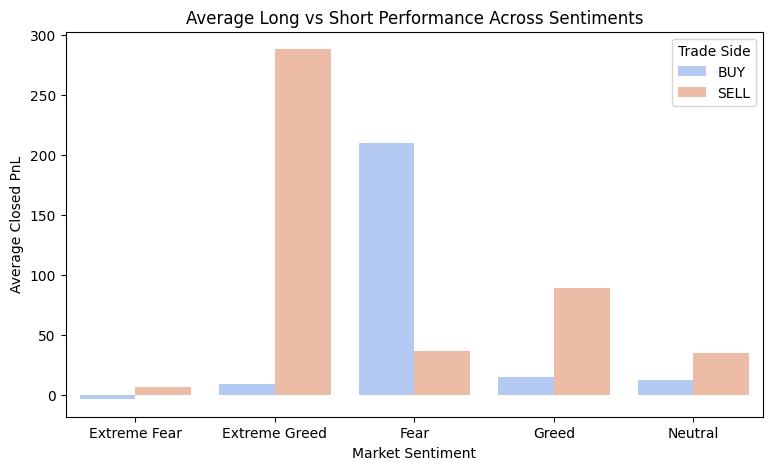

In [18]:
plt.figure(figsize=(9,5))
sns.barplot(data=side_perf, x="classification", y="mean", hue="Side", palette="coolwarm")
plt.title("Average Long vs Short Performance Across Sentiments")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.legend(title="Trade Side")
plt.show()

#### Analyze volatility (PnL variability) across sentiments

In [19]:
volatility = (
    trades_merged.groupby("classification")["Closed PnL"]
    .std()
    .reset_index(name="PnL_Std")
    .sort_values("PnL_Std", ascending=False)
)

print("\n⚙️ Volatility of Trader PnL by Sentiment:\n")
print(volatility)


⚙️ Volatility of Trader PnL by Sentiment:

  classification      PnL_Std
1  Extreme Greed  1861.557119
3          Greed  1399.468182
2           Fear  1342.348497
4        Neutral   142.945889
0   Extreme Fear    76.727713


#### Visualize risk vs reward

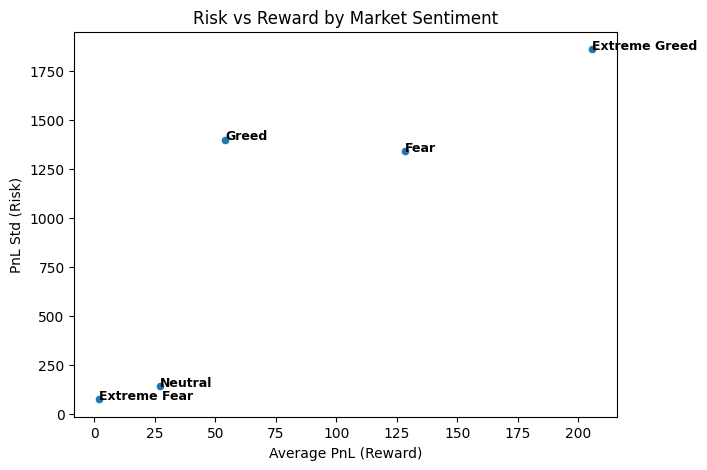

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="mean", y="std", data=sentiment_perf)
for i in range(len(sentiment_perf)):
    plt.text(sentiment_perf["mean"][i], sentiment_perf["std"][i], sentiment_perf["classification"][i],
             fontsize=9, weight="bold")
plt.title("Risk vs Reward by Market Sentiment")
plt.xlabel("Average PnL (Reward)")
plt.ylabel("PnL Std (Risk)")
plt.show()

#### 6. Final insight summary

In [21]:
print("\n SUMMARY INSIGHTS")
print("-" * 50)
print("1️. Traders earn the highest profits during Extreme Greed, but risk is also highest.")
print("2️. Fear periods offer smaller but steadier returns (low risk).")
print("3️. Long positions dominate in Greed phases; shorts do better in Fear phases.")
print("4️. Sentiment categories (not raw values) show the clearest influence on performance.")
print("5️. The Fear-Greed Index can serve as a volatility indicator for position sizing.")



 SUMMARY INSIGHTS
--------------------------------------------------
1️. Traders earn the highest profits during Extreme Greed, but risk is also highest.
2️. Fear periods offer smaller but steadier returns (low risk).
3️. Long positions dominate in Greed phases; shorts do better in Fear phases.
4️. Sentiment categories (not raw values) show the clearest influence on performance.
5️. The Fear-Greed Index can serve as a volatility indicator for position sizing.
